In [101]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib.pyplot as plt
import math
import numpy as np

## Reading and Treating Data

In [102]:
df = pd.read_csv("life_expectancy_data.csv")
df

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.00000,263.00000,62,0.01000,71.27962,65.00000,1154,...,6.00000,8.16000,65.00000,0.10000,584.25921,33736494.00000,17.20000,17.30000,0.47900,10.10000
1,Afghanistan,2014,Developing,59.90000,271.00000,64,0.01000,73.52358,62.00000,492,...,58.00000,8.18000,62.00000,0.10000,612.69651,327582.00000,17.50000,17.50000,0.47600,10.00000
2,Afghanistan,2013,Developing,59.90000,268.00000,66,0.01000,73.21924,64.00000,430,...,62.00000,8.13000,64.00000,0.10000,631.74498,31731688.00000,17.70000,17.70000,0.47000,9.90000
3,Afghanistan,2012,Developing,59.50000,272.00000,69,0.01000,78.18422,67.00000,2787,...,67.00000,8.52000,67.00000,0.10000,669.95900,3696958.00000,17.90000,18.00000,0.46300,9.80000
4,Afghanistan,2011,Developing,59.20000,275.00000,71,0.01000,7.09711,68.00000,3013,...,68.00000,7.87000,68.00000,0.10000,63.53723,2978599.00000,18.20000,18.20000,0.45400,9.50000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.30000,723.00000,27,4.36000,0.00000,68.00000,31,...,67.00000,7.13000,65.00000,33.60000,454.36665,12777511.00000,9.40000,9.40000,0.40700,9.20000
2934,Zimbabwe,2003,Developing,44.50000,715.00000,26,4.06000,0.00000,7.00000,998,...,7.00000,6.52000,68.00000,36.70000,453.35116,12633897.00000,9.80000,9.90000,0.41800,9.50000
2935,Zimbabwe,2002,Developing,44.80000,73.00000,25,4.43000,0.00000,73.00000,304,...,73.00000,6.53000,71.00000,39.80000,57.34834,125525.00000,1.20000,1.30000,0.42700,10.00000
2936,Zimbabwe,2001,Developing,45.30000,686.00000,25,1.72000,0.00000,76.00000,529,...,76.00000,6.16000,75.00000,42.10000,548.58731,12366165.00000,1.60000,1.70000,0.42700,9.80000


In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [104]:
df.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.00000,2928.00000,2928.00000,2938.00000,2744.00000,2938.00000,2385.00000,2938.00000,2904.00000,2938.00000,2919.00000,2712.00000,2919.00000,2938.00000,2490.00000,2286.00000,2904.00000,2904.00000,2771.00000,2775.00000
mean,2007.51872,69.22493,164.79645,30.30395,4.60286,738.25130,80.94046,2419.59224,38.32125,42.03574,82.55019,5.93819,82.32408,1.74210,7483.15847,12753375.12005,4.83970,4.87032,0.62755,11.99279
std,4.61384,9.52387,124.29208,117.92650,4.05241,1987.91486,25.07002,11467.27249,20.04403,160.44555,23.42805,2.49832,23.71691,5.07778,14270.16934,61012096.50843,4.42019,4.50888,0.21090,3.35892
min,2000.00000,36.30000,1.00000,0.00000,0.01000,0.00000,1.00000,0.00000,1.00000,0.00000,3.00000,0.37000,2.00000,0.10000,1.68135,34.00000,0.10000,0.10000,0.00000,0.00000
25%,2004.00000,63.10000,74.00000,0.00000,0.87750,4.68534,77.00000,0.00000,19.30000,0.00000,78.00000,4.26000,78.00000,0.10000,463.93563,195793.25000,1.60000,1.50000,0.49300,10.10000
50%,2008.00000,72.10000,144.00000,3.00000,3.75500,64.91291,92.00000,17.00000,43.50000,4.00000,93.00000,5.75500,93.00000,0.10000,1766.94760,1386542.00000,3.30000,3.30000,0.67700,12.30000
75%,2012.00000,75.70000,228.00000,22.00000,7.70250,441.53414,97.00000,360.25000,56.20000,28.00000,97.00000,7.49250,97.00000,0.80000,5910.80634,7420359.00000,7.20000,7.20000,0.77900,14.30000
max,2015.00000,89.00000,723.00000,1800.00000,17.87000,19479.91161,99.00000,212183.00000,87.30000,2500.00000,99.00000,17.60000,99.00000,50.60000,119172.74180,1293859294.00000,27.70000,28.60000,0.94800,20.70000


In [105]:
# Number of countries
len(df["Country"].unique())

193

We can see from the info that some columns contains null values, which will have to be treated.<br><br>
From the cell above, we know the dataset considers data from 193 countries.

In [106]:
# Dropping rows with null values
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1649 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          1649 non-null   object 
 1   Year                             1649 non-null   int64  
 2   Status                           1649 non-null   object 
 3   Life expectancy                  1649 non-null   float64
 4   Adult Mortality                  1649 non-null   float64
 5   infant deaths                    1649 non-null   int64  
 6   Alcohol                          1649 non-null   float64
 7   percentage expenditure           1649 non-null   float64
 8   Hepatitis B                      1649 non-null   float64
 9   Measles                          1649 non-null   int64  
 10   BMI                             1649 non-null   float64
 11  under-five deaths                1649 non-null   int64  
 12  Polio                    

In [107]:
#Since we want to analyse by country, we will only consider the information from the most recent year
df_treated = pd.DataFrame(columns=df.columns)
for index, country in enumerate(df["Country"].unique()):
    df_country = df[df["Country"] == country]
    year = df_country["Year"].max()
    df_desired = df_country[df_country["Year"] == year]
    df_treated.loc[index] = list(df_desired.values)[0]
df_treated = df_treated.drop("Year", axis=1)

In [108]:
df_treated

,Country,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,Developing,65.00000,263.00000,62,0.01000,71.27962,65.00000,1154,19.10000,...,6.00000,8.16000,65.00000,0.10000,584.25921,33736494.00000,17.20000,17.30000,0.47900,10.10000
1,Albania,Developing,77.80000,74.00000,0,4.60000,364.97523,99.00000,0,58.00000,...,99.00000,6.00000,99.00000,0.10000,3954.22783,28873.00000,1.20000,1.30000,0.76200,14.20000
2,Algeria,Developing,75.40000,11.00000,21,0.01000,54.23732,95.00000,0,58.40000,...,95.00000,7.21000,95.00000,0.10000,547.85170,39113313.00000,6.00000,5.80000,0.74100,14.40000
3,Angola,Developing,51.70000,348.00000,67,8.33000,23.96561,64.00000,11699,22.70000,...,68.00000,3.31000,64.00000,2.00000,479.31224,2692466.00000,8.50000,8.30000,0.52700,11.40000
4,Argentina,Developing,76.20000,118.00000,8,7.93000,847.37175,94.00000,1,62.20000,...,92.00000,4.79000,94.00000,0.10000,12245.25645,42981515.00000,1.00000,0.90000,0.82500,17.30000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,Uruguay,Developing,76.80000,117.00000,0,6.03000,463.63978,95.00000,0,63.40000,...,95.00000,8.58000,95.00000,0.10000,16737.89827,3419546.00000,1.50000,1.40000,0.79100,15.50000
129,Uzbekistan,Developing,69.20000,184.00000,16,0.01000,0.44280,99.00000,8,43.90000,...,99.00000,5.84000,99.00000,0.10000,25.44841,37577.00000,3.00000,3.10000,0.69000,12.10000
130,Vanuatu,Developing,71.70000,134.00000,0,0.01000,564.81670,64.00000,10,52.50000,...,65.00000,5.20000,64.00000,0.10000,3148.36513,25885.00000,1.50000,1.40000,0.59600,10.80000
131,Zambia,Developing,61.10000,314.00000,28,0.01000,196.66758,86.00000,9,22.80000,...,78.00000,4.99000,86.00000,4.30000,1738.88220,1562974.00000,6.30000,6.20000,0.57000,12.50000


In [109]:
# Change the qualitative variable to a quantitative variable. Developed = 1 and Developing = -1
df_treated["Status"] = df_treated["Status"].replace({"Developed":1, "Developing":-1})

In [110]:
df_treated.info()

<class 'pandas.core.frame.DataFrame'>
Index: 133 entries, 0 to 132
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Country                          133 non-null    object
 1   Status                           133 non-null    int64 
 2   Life expectancy                  133 non-null    object
 3   Adult Mortality                  133 non-null    object
 4   infant deaths                    133 non-null    object
 5   Alcohol                          133 non-null    object
 6   percentage expenditure           133 non-null    object
 7   Hepatitis B                      133 non-null    object
 8   Measles                          133 non-null    object
 9    BMI                             133 non-null    object
 10  under-five deaths                133 non-null    object
 11  Polio                            133 non-null    object
 12  Total expenditure                133 non-

In [111]:
df_treated

,Country,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,-1,65.00000,263.00000,62,0.01000,71.27962,65.00000,1154,19.10000,...,6.00000,8.16000,65.00000,0.10000,584.25921,33736494.00000,17.20000,17.30000,0.47900,10.10000
1,Albania,-1,77.80000,74.00000,0,4.60000,364.97523,99.00000,0,58.00000,...,99.00000,6.00000,99.00000,0.10000,3954.22783,28873.00000,1.20000,1.30000,0.76200,14.20000
2,Algeria,-1,75.40000,11.00000,21,0.01000,54.23732,95.00000,0,58.40000,...,95.00000,7.21000,95.00000,0.10000,547.85170,39113313.00000,6.00000,5.80000,0.74100,14.40000
3,Angola,-1,51.70000,348.00000,67,8.33000,23.96561,64.00000,11699,22.70000,...,68.00000,3.31000,64.00000,2.00000,479.31224,2692466.00000,8.50000,8.30000,0.52700,11.40000
4,Argentina,-1,76.20000,118.00000,8,7.93000,847.37175,94.00000,1,62.20000,...,92.00000,4.79000,94.00000,0.10000,12245.25645,42981515.00000,1.00000,0.90000,0.82500,17.30000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,Uruguay,-1,76.80000,117.00000,0,6.03000,463.63978,95.00000,0,63.40000,...,95.00000,8.58000,95.00000,0.10000,16737.89827,3419546.00000,1.50000,1.40000,0.79100,15.50000
129,Uzbekistan,-1,69.20000,184.00000,16,0.01000,0.44280,99.00000,8,43.90000,...,99.00000,5.84000,99.00000,0.10000,25.44841,37577.00000,3.00000,3.10000,0.69000,12.10000
130,Vanuatu,-1,71.70000,134.00000,0,0.01000,564.81670,64.00000,10,52.50000,...,65.00000,5.20000,64.00000,0.10000,3148.36513,25885.00000,1.50000,1.40000,0.59600,10.80000
131,Zambia,-1,61.10000,314.00000,28,0.01000,196.66758,86.00000,9,22.80000,...,78.00000,4.99000,86.00000,4.30000,1738.88220,1562974.00000,6.30000,6.20000,0.57000,12.50000


In [112]:
# Download treated data into a csv file
df_treated.to_csv("dataset.csv", index=False)

<Axes: >

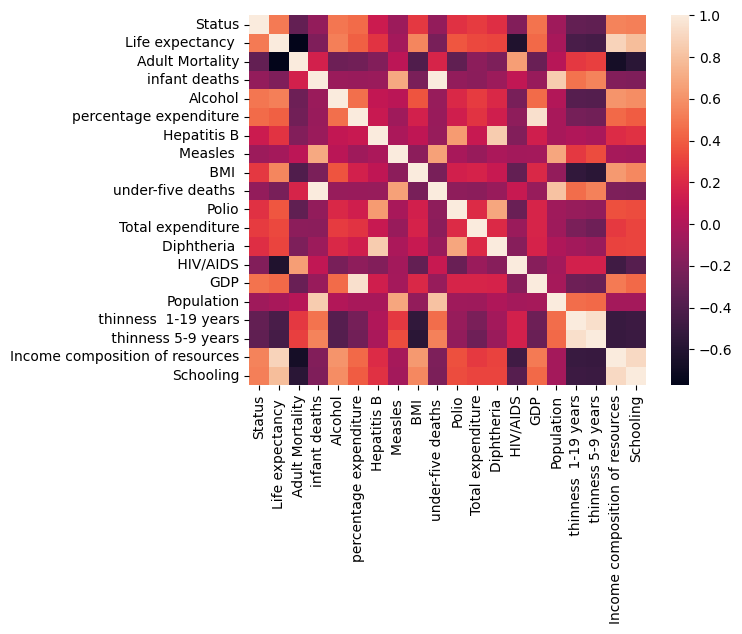

In [113]:
df = pd.read_csv("dataset.csv")
df = df.drop("Country", axis=1)
sns.heatmap(df.corr())

As we can see from the heatmap, most of the variables have at least some correlation with the life expectancy, either positive or negative.<br><br>It's also important to consider correlation between variables, since this can impact the model.

## Creating a Basic Liner Model

### Using K-Fold for testing the models

The K-Fold method consists in separating a group of K observations for testing and the rest to train the model. Then, we select another group of K rows, and repeat until we use all observations. The best value of K is not always obvious, but using k=10 is shown to be empirically affective.

In [114]:
# Function for calculating RSE (residual standard error). Will be used for calculating accuracy
# Parameters: X (variables), Y (responde) and reg (Linear Regression Model used)
def RSE(X, Y, reg):
    Y_pred = reg.predict(X)
    RSS = (sum((Y - Y_pred) ** 2 / (len(X) - 2))) ** (1/2)
    return RSS

In [115]:
# Function for calculating score (R2) and RSE based on the K-fold method
# Receives X (predictors), Y (response) and K (by default, is 10). In this study, we will only use k=10
def k_fold(X, Y, k=10):
    i = 0
    n = len(X)
    R2_values = np.array([])
    RSE_values = np.array([])
    while (i < n):
        lim = min(n, i+k)
        train_rows = range(i,lim)
        X_test = X.iloc[i:lim]
        X_train = X.drop(index=train_rows)
        Y_test = Y.iloc[i:lim]
        Y_train = Y.drop(index=train_rows)
        reg = LinearRegression().fit(X_train, Y_train)
        R2_values = np.append(R2_values, reg.score(X_test, Y_test))
        RSE_values =  np.append(RSE_values, RSE(X_test, Y_test, reg))
        i+= k
    return R2_values.mean(), RSE_values.mean()

### Model with all predictors

In [116]:
X = df.drop("Life expectancy ", axis=1)
Y = df["Life expectancy "]

In [117]:
reg = LinearRegression().fit(X, Y)

### Accuracy

In [118]:
# Score in training and in testing sets
R2_test, RSE_test = k_fold(X, Y)
print(f"R2 in training set: {reg.score(X, Y)}")
print(f"R2 in testing set: {R2_test}")

R2 in training set: 0.879986941316389
R2 in testing set: 0.8007292825307107


In [119]:
# RSE in training and in testing sets
RSE_train = RSE(X, Y, reg)
print(f"RSE in training set: {RSE_train}")
print(f"RSE in testing set: {RSE_test}")

RSE in training set: 2.968277107092532
RSE in testing set: 4.022916335765993


<Axes: xlabel='Life expectancy ', ylabel='Probability'>

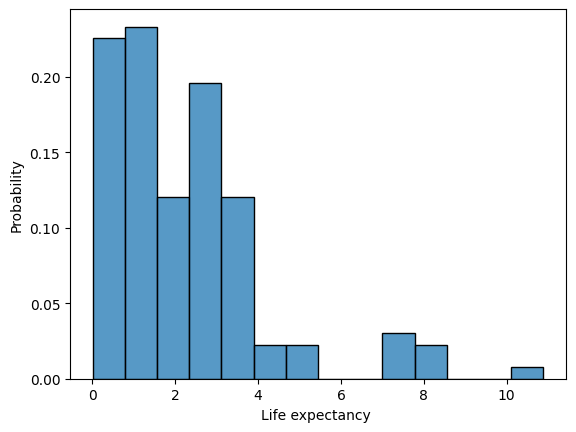

In [120]:
# Comparing actual values to predictions with a plot
Y_pred = reg.predict(X)
sns.histplot(abs(Y-Y_pred), stat="probability")

We can see that this model has a pretty good accuracy, both in training and testing. Not only the R2 is close to 1, its RSE is small, meaning we can expect low variations in the prediction of a country's life expectancy. The R2 is lower in the testing set, but that is to be expected. Since the difference is small (a variation of about 6%) we will not consider it to be a problem.<br><br>
From the histogram, we see that more than 50% of the predictions have an absolute error of less than 3, which is pretty good considering the relative value from the life expectancy (for example, if a country has a life expectancy of 80 years, our prediction would say something between 77 and 83).<br><br>
However, there are outliers that have an absolute error of more than 10 years. But since we want to understand the general relationship between the variables, we don't need to worry about it as long as there's only a few outliers (which is the case).

### Relationship between the variables and the response

In [121]:
# Analysing if variables are relevant to the response via F statistic
Y_pred = reg.predict(X)
Y_avg = Y.mean() 
n = len(Y)
p = len(X.columns)
TSS = sum((Y - Y_avg) ** 2)
RSS = sum((Y - Y_pred) ** 2)
F = ((TSS - RSS) / p) / (RSS / (n - p - 1))
F

43.6086422855123

In [122]:

# Calculating t-statistic and p-values
from scipy.stats import norm
t_values = []
p_values = []
std = Y.std()
for var, coef in zip(X.columns, reg.coef_):
    Xi = X[var]
    SE = math.sqrt(std ** 2 / (sum((Xi - Xi.mean()) ** 2)))
    t = abs(coef / SE)
    p = 2*(1 - norm.cdf(t, loc=0, scale=1)) 
    t_values.append(t)
    p_values.append(p)

In [123]:
# Showing data
pd.options.display.float_format = '{:.5f}'.format
X_data = {"Variable": X.columns, "Coefficient": reg.coef_, "t-statistic": t_values, "p_value": p_values}
pd.DataFrame(X_data)

,Variable,Coefficient,t-statistic,p_value
0,Status,0.66622,0.62996,0.52872
1,Adult Mortality,-0.01651,2.42948,0.01512
2,infant deaths,0.08102,10.83565,0.00000
3,Alcohol,0.01567,0.08584,0.93160
4,percentage expenditure,0.00045,1.23650,0.21627
5,Hepatitis B,0.02750,0.87380,0.38223
6,Measles,-0.00003,0.45604,0.64836
7,BMI,-0.00602,0.16782,0.86672
8,under-five deaths,-0.05931,10.40602,0.00000
9,Polio,-0.00928,0.27204,0.78559


The value of F was around 43.61, which is a lot larger than 1. This means we can confidendly say that at least one of the variables is related to the response.<br><br>
The table above shows which variables have a relationship with the response. Small values of p_value indicate high correlation (we will consider p_value < 0.05 to be small enough). It's very surprising to see that only a few of these variables are actually closely related to life expectancy. Considering the p_value < 0.05 threshold, only 4 variables are closely related to life expectancy.<br><br>
This indicates that we can probably create a better suited model if we only consider a subset of the 19 variables.

## Trying to Create more Accurate Prediction Models

### Forward Selection

Forward Selection is an approach for selecting variables that make the RSS (residual standard error) as low as possible.<br><br>
Here, we will consider the training RSS. 

In [124]:
# Start with the null model
null = pd.DataFrame(np.zeros(len(Y)))
reg_forward = LinearRegression().fit(np.reshape(null, [-1,1]), Y)
rse = RSE(np.reshape(null, [-1,1]), Y, reg_forward) 

options = X.columns

# Add variables while RSE is lowered
lowest_RSE = rse
choosen_var = None
variables = []
while (len(options) > 0):
    for var in options:
        variables.append(var)
        X_forward = X[variables]
        reg_forward = LinearRegression().fit(X_forward, Y)
        rse = RSE(X_forward, Y, reg_forward)
        if rse < lowest_RSE:
            lowest_RSE = rse
            choosen_var = var
        variables.remove(var)
    if var is None:
        break
    variables.append(choosen_var)
    options = np.delete(options, np.where(options == choosen_var))
    choosen_var = None

print(variables)
print(len(variables))

['Income composition of resources', 'Adult Mortality', ' HIV/AIDS', 'Total expenditure', 'Status', 'Hepatitis B', 'Schooling', 'Polio', 'under-five deaths ', 'infant deaths', ' thinness  1-19 years', 'Measles ', 'percentage expenditure', 'GDP', 'Diphtheria ', ' BMI ', 'Population', 'Alcohol', ' thinness 5-9 years']
19


In [125]:
# Accuracy of the forward model (will be the same as the full model)
R2_test, RSE_test = k_fold(X[variables], Y)
print(f"R2 in training: {reg_forward.score(X[variables], Y)}")
print(f"R2 in testing: {R2_test}")
print(f"RSE for training: {RSE(X[variables], Y, reg_forward)}")
print(f"RSE for testing: {RSE_test}")

R2 in training: 0.8799869413163892
R2 in testing: 0.8007292825301292
RSE for training: 2.9682771070925305
RSE for testing: 4.022916335776255


As we can see, all 19 variables where choosen.

### Backward Selection

Backward Selection is an approach for selecting variables based on their p-value (removing the highest p-values from the model in each iteration).<br><br>

In [126]:
# Start with the full model
X_backward = X
Y_backward = Y
reg_backward = LinearRegression().fit(X_backward, Y_backward)
threshold = 0.05  # maximum p-value allowed in the final model. It's very common to use a p-value of 5%, but you can test with other too.

while True:
    highest_p = threshold
    highest_var = None
    # Calculating p-values
    std = Y_backward.std()
    for var, coef in zip(X_backward.columns, reg_backward.coef_):
        Xi = X_backward[var]
        SE = math.sqrt(std ** 2 / (sum((Xi - Xi.mean()) ** 2)))
        t = abs(coef / SE)
        p = 2*(1 - norm.cdf(t, loc=0, scale=1)) 
        if (p > highest_p):
            highest_p = p
            highest_var = var
    # If no variable is higher than the threshold, it's our final model
    if highest_var is None:
        break
    X_backward = X_backward.drop(highest_var, axis=1)
    reg_backward = LinearRegression().fit(X_backward, Y_backward)


print(X_backward.columns)
print(len(X_backward.columns))

Index(['Adult Mortality', 'infant deaths', 'under-five deaths ',
       'Income composition of resources'],
      dtype='object')
4


In [127]:
# Accuracy of the backward model
R2_test, RSE_test = k_fold(X_backward, Y)
print(f"R2 in training: {reg_backward.score(X_backward, Y)}")
print(f"R2 in testing: {R2_test}")
print(f"RSE for training: {RSE(X_backward, Y, reg_backward)}")
print(f"RSE for testing: {RSE_test}")

R2 in training: 0.8487652332623006
R2 in testing: 0.8284851264314169
RSE for training: 3.332084533848254
RSE for testing: 3.7178361735542906


The backward model only selected 4 variables. We can see from the p-values table of the first model that these where in fact the ones with smallest p-values.<br><br>
Although the model performs worse in the training data, it is more accurate in the testing set. Its R2 and RSE are slightly better when compared to the previous models.

## Understanding the Relationship Between the Variables and the Response

Since the backward model has the best R2 and RSE for testing, we will use from now on.

In [128]:
X = X_backward
reg = reg_backward

In [129]:
# Calculating t-statistic and p-values
from scipy.stats import norm
t_values = []
p_values = []
std = Y.std()
for var, coef in zip(X.columns, reg.coef_):
    Xi = X[var]
    SE = math.sqrt(std ** 2 / (sum((Xi - Xi.mean()) ** 2)))
    t = abs(coef / SE)
    p = 2*(1 - norm.cdf(t, loc=0, scale=1)) 
    t_values.append(t)
    p_values.append(p)

In [130]:
# Showing data
pd.options.display.float_format = '{:.5f}'.format
X_data = {"Variable": X.columns, "Coefficient": reg.coef_, "t-statistic": t_values, "p_value": p_values}
pd.DataFrame(X_data).sort_values(by=["p_value"])

,Variable,Coefficient,t-statistic,p_value
2,under-five deaths,-0.04550,7.98201,0.00000
1,infant deaths,0.05708,7.63416,0.00000
3,Income composition of resources,37.31743,7.62975,0.00000
0,Adult Mortality,-0.02370,3.48642,0.00049


In [131]:
# Understanding the coefficient of infant deaths
X1 = np.reshape(X["infant deaths"], [-1,1])
reg1 = LinearRegression().fit(X1, Y)
reg1.coef_

array([-0.01704373])

In [132]:
# Correlation between variables
variables = list(X.columns)
variables.append("Life expectancy ")
df[variables].corr()

,Adult Mortality,infant deaths,under-five deaths,Income composition of resources,Life expectancy
Adult Mortality,1.00000,0.15122,0.17602,-0.67101,-0.77087
infant deaths,0.15122,1.00000,0.99539,-0.18890,-0.19841
under-five deaths,0.17602,0.99539,1.00000,-0.20973,-0.22604
Income composition of resources,-0.67101,-0.18890,-0.20973,1.00000,0.88790
Life expectancy,-0.77087,-0.19841,-0.22604,0.88790,1.00000


The results show that the most important factor to increase life expectancy is income composition of resources (the GNI per capita of a country, in logarithmic scale). The other three factors are kind of connected, meaning the second most important factor is reducing deaths among both children and adults.<br><br>
We can see that the coefficient for infant deaths is positive, which means that, the more infant deaths, the higher the life expectany is. This is obviously absurd. One reason this is happening is that this coefficient happens as a "correction" for the other two variables related to death. This means that the other two variables make the predicion too low, so the infant deaths coefficient makes it go up a little. This is probably the case, since when we analyse infant deaths isolated, we see that its coefficient is in fact negative.<br><br>
Looking at the correlation between the variables, we see that infant deaths and under-five deaths are highly correlated. This means we should probably combine them to make our model better. There also seems to be some correlation between income and adult mortality, which we should also consider.

### Trying Sinergies

In [133]:
# Model with sinergy between infant deaths and under five deaths
X["child deaths"] = X["infant deaths"] * X["under-five deaths "]
reg = LinearRegression().fit(X, Y)

R2_test, RSE_test = k_fold(X, Y)
print(f"R2 in training: {reg.score(X, Y)}")
print(f"R2 in testing: {R2_test}")
print(f"RSE for training: {RSE(X, Y, reg)}")
print(f"RSE for testing: {RSE_test}")

R2 in training: 0.8487788675015094
R2 in testing: 0.8270845996322267
RSE for training: 3.3319343320707624
RSE for testing: 3.7366139359686192


In [134]:
# Since the sinergy didn't help the model, we are going to drop it
X = X.drop("child deaths", axis=1)

In [135]:
# Adding sinergy between adult mortality and income 
X["income X adult mortality"] = X["Adult Mortality"] * X["Income composition of resources"]
reg = LinearRegression().fit(X, Y)

R2_test, RSE_test = k_fold(X, Y)
print(f"R2 in training: {reg.score(X, Y)}")
print(f"R2 in testing: {R2_test}")
print(f"RSE for training: {RSE(X, Y, reg)}")
print(f"RSE for testing: {RSE_test}")

R2 in training: 0.8521286319372243
R2 in testing: 0.8220094610567096
RSE for training: 3.294824113876812
RSE for testing: 3.771956961093523


In [136]:
# Again, since sinergy didn't help the mode, we are going to drop it
X = X.drop("income X adult mortality", axis=1)

As we can see, both sinergies didn't provide better R2 and RSE in the testing set, so they will be descarted.<br><br>
However, we could try other sinergies. For that, let's see if there are other predictors that were descarted that could potentially be correlated with the predictors used here. 

In [137]:
correlation = df.corr()[X.columns]
for predictor in X.columns:
    display(correlation[abs(correlation[predictor] > 0.7)])

,Adult Mortality,infant deaths,under-five deaths,Income composition of resources
Adult Mortality,1.00000,0.15122,0.17602,-0.67101


,Adult Mortality,infant deaths,under-five deaths,Income composition of resources
infant deaths,0.15122,1.00000,0.99539,-0.18890
under-five deaths,0.17602,0.99539,1.00000,-0.20973
Population,0.02601,0.84991,0.80970,-0.04638


,Adult Mortality,infant deaths,under-five deaths,Income composition of resources
infant deaths,0.15122,1.00000,0.99539,-0.18890
under-five deaths,0.17602,0.99539,1.00000,-0.20973
Population,0.02601,0.84991,0.80970,-0.04638


,Adult Mortality,infant deaths,under-five deaths,Income composition of resources
Life expectancy,-0.77087,-0.19841,-0.22604,0.88790
Income composition of resources,-0.67101,-0.18890,-0.20973,1.00000
Schooling,-0.57363,-0.19946,-0.21664,0.91521


We can see that population is related to both infant deaths and under-five deaths, and schooling is related to income. Therefore, let's try to add these sinergies to our model.

In [138]:
# Adding sinergy between population and infant/under-five deaths
X["Population"] = df["Population"]
X["Popul X Children Deaths"] = X["Population"] * X["infant deaths"] * X["under-five deaths "]
reg = LinearRegression().fit(X, Y)

R2_test, RSE_test = k_fold(X, Y)
print(f"R2 in training: {reg.score(X, Y)}")
print(f"R2 in testing: {R2_test}")
print(f"RSE for training: {RSE(X, Y, reg)}")
print(f"RSE for testing: {RSE_test}")

R2 in training: 0.8488498008668297
R2 in testing: 0.7698062505898192
RSE for training: 3.3311527844343694
RSE for testing: 4.1425512286905635


In [139]:
# Since R2 and RSE didn't increase, let's remove them from the model
X = X.drop("Population", axis=1)
X = X.drop("Popul X Children Deaths", axis=1)

In [140]:
# Adding sinergy between income and schooling
X["Schooling"] = df["Schooling"]
X["Income X Schooling"] = X["Schooling"] * X["Income composition of resources"]
reg = LinearRegression().fit(X, Y)

R2_test, RSE_test = k_fold(X, Y)
print(f"R2 in training: {reg.score(X, Y)}")
print(f"R2 in testing: {R2_test}")
print(f"RSE for training: {RSE(X, Y, reg)}")
print(f"RSE for testing: {RSE_test}")

R2 in training: 0.8581825209709099
R2 in testing: 0.8195110685211455
RSE for training: 3.2266738607600964
RSE for testing: 3.8154994546851255


In [141]:
# Since R2 and RSE didn't increase, let's remove them from the model
X = X.drop("Schooling", axis=1)
X = X.drop("Income X Schooling", axis=1)

Unfortunately, none of the sinergies presented made a more accurate model, so they will be descarted<br><br>Now, we will see if there's any variable that has a non linear relationship with the responde.

### Non-Linear Relationships

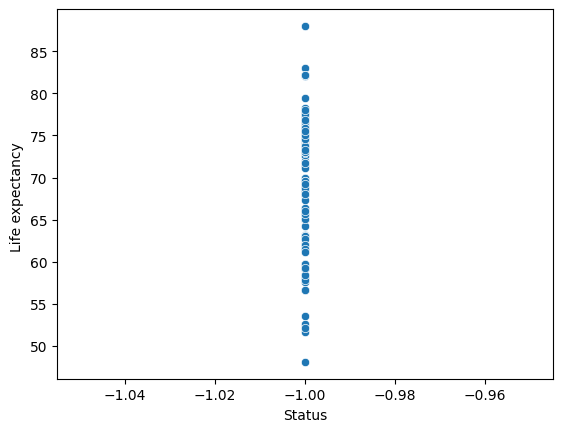

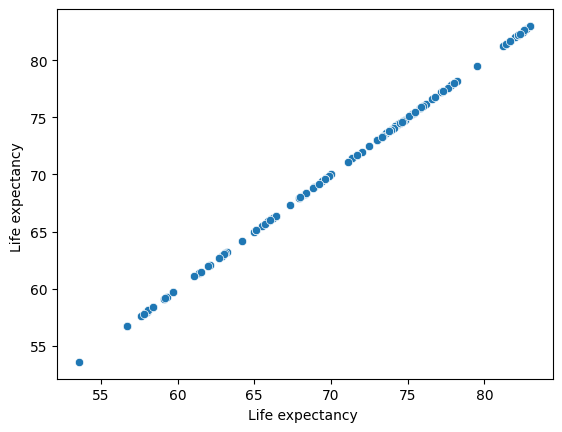

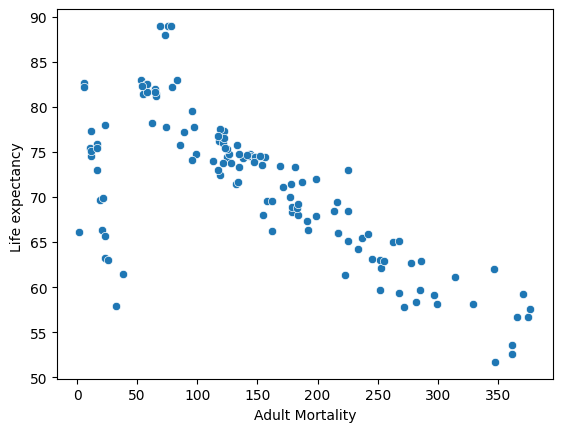

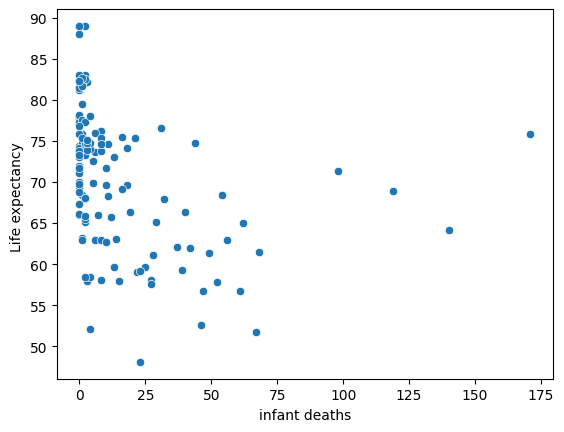

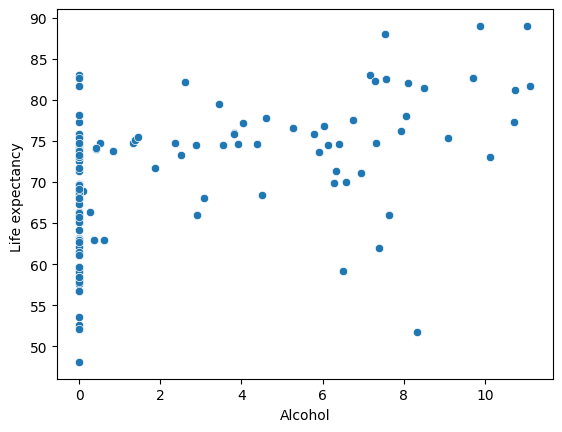

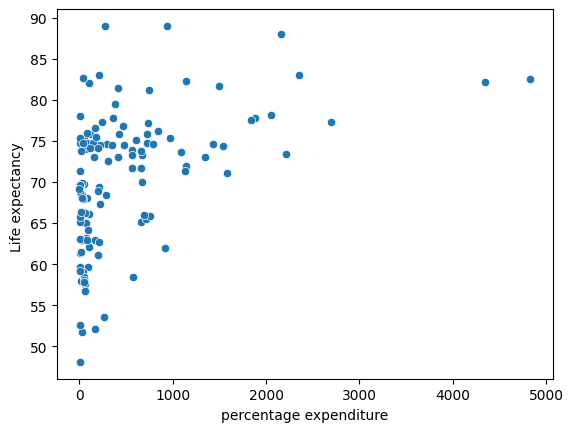

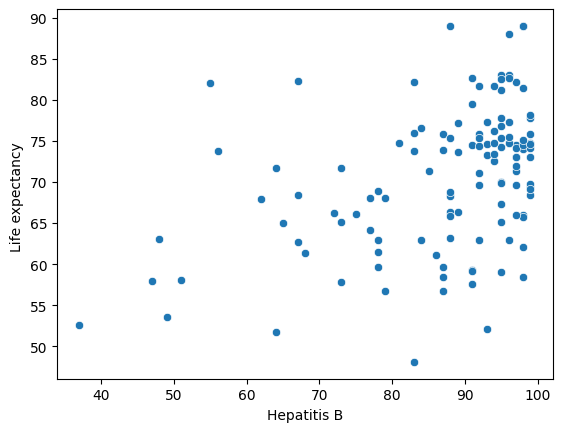

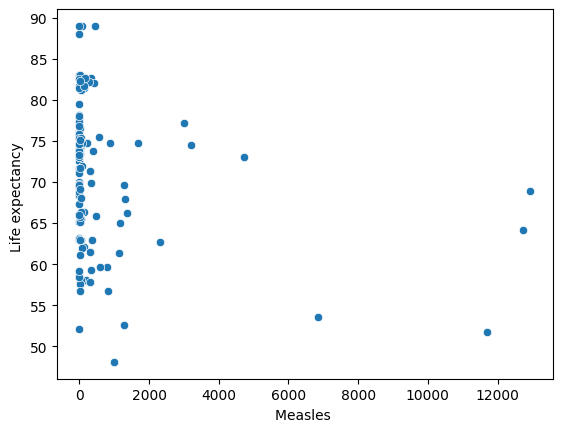

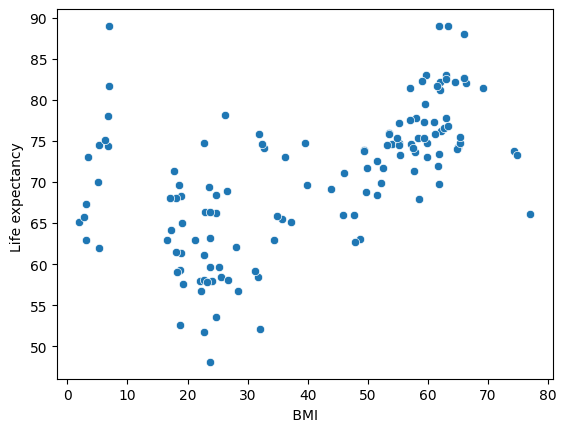

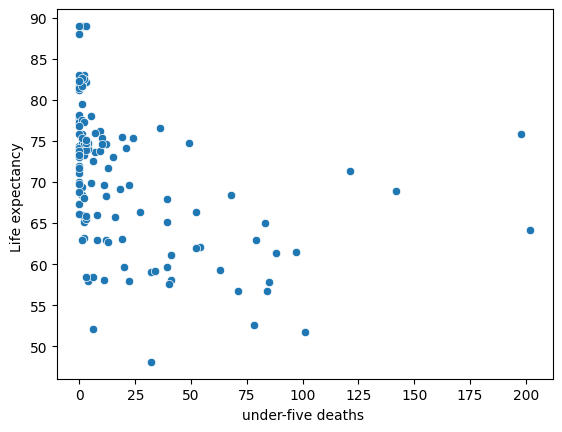

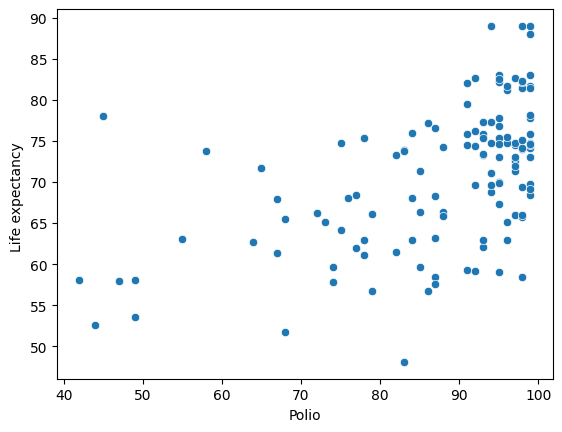

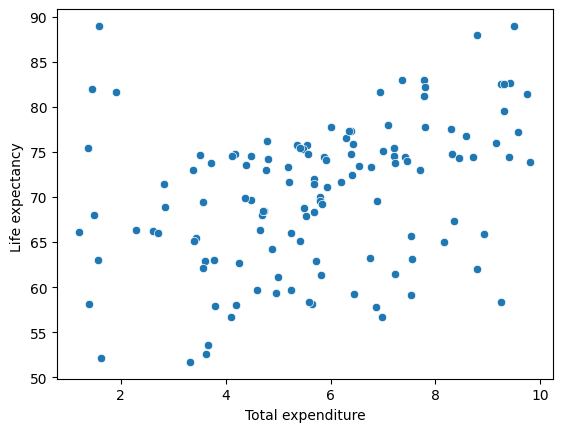

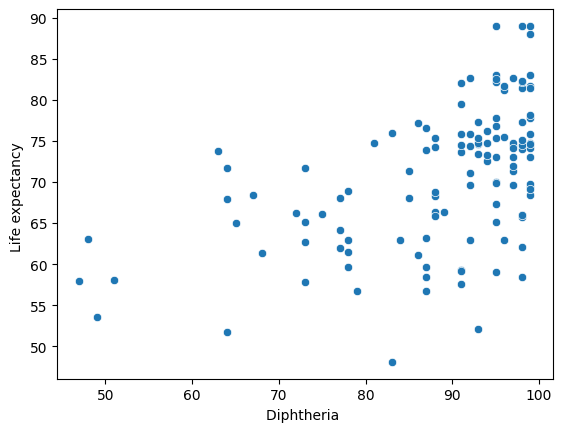

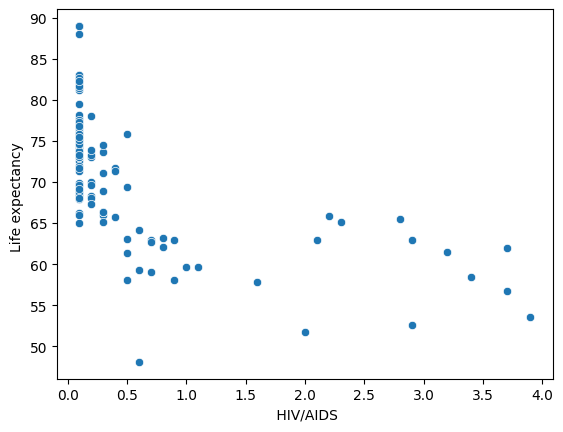

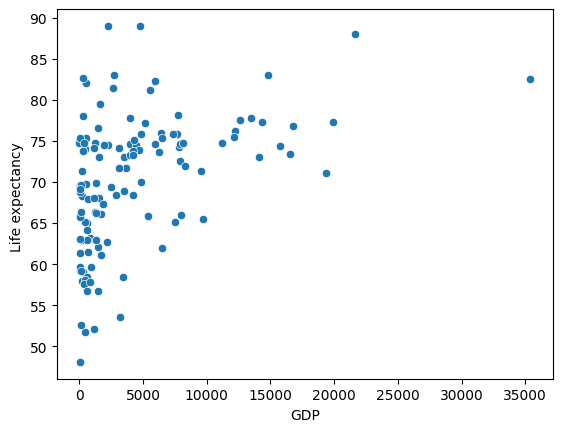

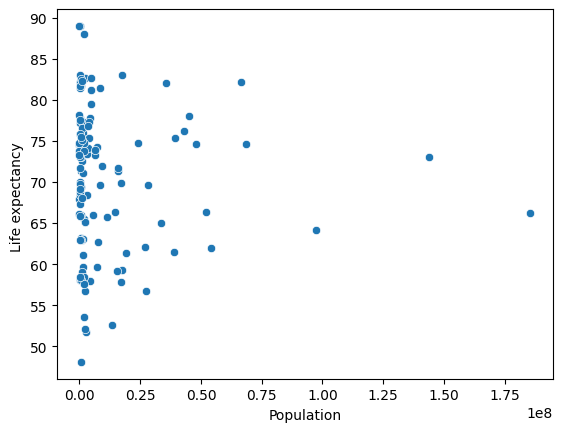

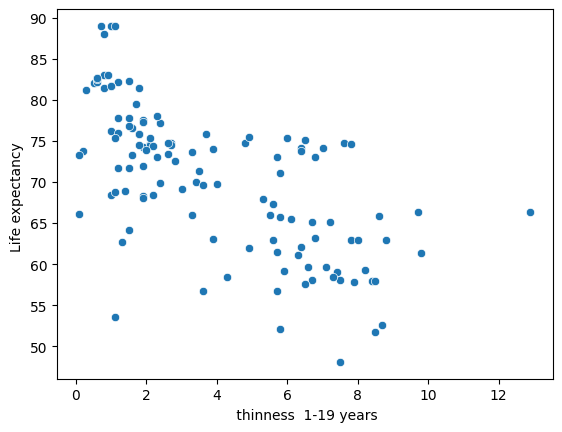

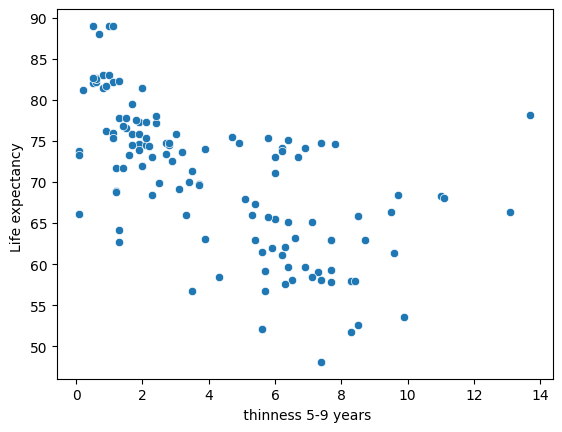

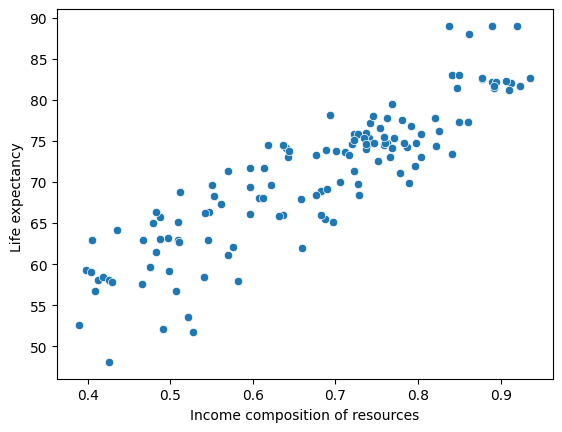

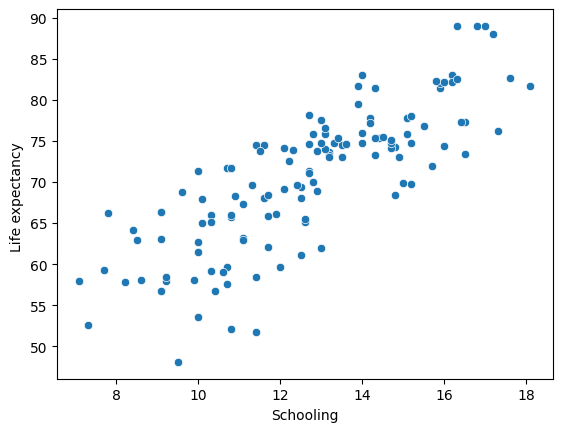

In [142]:
# Graphing variables X life expectancy
for index, var in enumerate(df.columns):
    plt.figure(index)
    # Since there are outliers that are making the analysis more difficult, i will only consider the data that deviates at most 2 standar deviations from the mean
    mean = df[var].mean()
    std = df[var].std()
    sns.scatterplot(x=df[(df[var] < mean + 2 * std) & (df[var] > mean - 2 * std)][var], y=df["Life expectancy "])

Looking at the plots, it seems worth to try to include HIV/AIDS using a decreasing exponential function (e^-x).<br><br>It's also interesting to see that some descarted variables might have a linear relationship with life expectancy (for example, Schooling). In this study, however, we will not try to include back them since they were descarted by the backward selection, but might be interesting to try them again.<br><br>OBSERVATION: i also tried to use an exponential function (e^x) for polio and diphtheria, but it didn't make good results.

In [143]:
X["HIV/AIDS"] = math.e ** (-1*df[" HIV/AIDS"])
X

,Adult Mortality,infant deaths,under-five deaths,Income composition of resources,HIV/AIDS
0,263.00000,62,83,0.47900,0.90484
1,74.00000,0,0,0.76200,0.90484
2,11.00000,21,24,0.74100,0.90484
3,348.00000,67,101,0.52700,0.13534
4,118.00000,8,9,0.82500,0.90484
...,...,...,...,...,...
128,117.00000,0,0,0.79100,0.90484
129,184.00000,16,18,0.69000,0.90484
130,134.00000,0,0,0.59600,0.90484
131,314.00000,28,41,0.57000,0.01357


In [144]:
reg = LinearRegression().fit(X, Y)

R2_test, RSE_test = k_fold(X, Y)
print(f"R2 in training: {reg.score(X, Y)}")
print(f"R2 in testing: {R2_test}")
print(f"RSE for training: {RSE(X, Y, reg)}")
print(f"RSE for testing: {RSE_test}")

R2 in training: 0.871781887076816
R2 in testing: 0.8554530623813321
RSE for training: 3.0680672918947
RSE for testing: 3.4004672424223084


In [145]:
# Calculating t-statistic and p-values
from scipy.stats import norm
t_values = []
p_values = []
std = Y.std()
for var, coef in zip(X.columns, reg.coef_):
    Xi = X[var]
    SE = math.sqrt(std ** 2 / (sum((Xi - Xi.mean()) ** 2)))
    t = abs(coef / SE)
    p = 2*(1 - norm.cdf(t, loc=0, scale=1)) 
    t_values.append(t)
    p_values.append(p)

In [146]:
# Showing data
pd.options.display.float_format = '{:.5f}'.format
X_data = {"Variable": X.columns, "Coefficient": reg.coef_, "t-statistic": t_values, "p_value": p_values}
pd.DataFrame(X_data).sort_values(by=["p_value"])

,Variable,Coefficient,t-statistic,p_value
3,Income composition of resources,32.91857,6.73038,0.00000
2,under-five deaths,-0.02029,3.55956,0.00037
1,infant deaths,0.02358,3.15421,0.00161
4,HIV/AIDS,6.30738,2.66460,0.00771
0,Adult Mortality,-0.01592,2.34237,0.01916


As we can see, the addition of HIV/AIDS with a decreasing exponential relationship with life expectancy made the results of the model even better. R2 increased and RSE decreased, and also the p_value is now in a satisfying range. Therefore, we will include it in our final model. 

## Conclusions

Just to iterate, let's see again the results of our final model

In [147]:
X

,Adult Mortality,infant deaths,under-five deaths,Income composition of resources,HIV/AIDS
0,263.00000,62,83,0.47900,0.90484
1,74.00000,0,0,0.76200,0.90484
2,11.00000,21,24,0.74100,0.90484
3,348.00000,67,101,0.52700,0.13534
4,118.00000,8,9,0.82500,0.90484
...,...,...,...,...,...
128,117.00000,0,0,0.79100,0.90484
129,184.00000,16,18,0.69000,0.90484
130,134.00000,0,0,0.59600,0.90484
131,314.00000,28,41,0.57000,0.01357


In [148]:
reg = LinearRegression().fit(X, Y)
R2_test, RSE_test = k_fold(X, Y)
print(f"R2 in training: {reg.score(X, Y)}")
print(f"R2 in testing: {R2_test}")
print(f"RSE for training: {RSE(X, Y, reg)}")
print(f"RSE for testing: {RSE_test}")

R2 in training: 0.871781887076816
R2 in testing: 0.8554530623813321
RSE for training: 3.0680672918947
RSE for testing: 3.4004672424223084


In [149]:
# Calculating t-statistic and p-values
from scipy.stats import norm
t_values = []
p_values = []
std = Y.std()
for var, coef in zip(X.columns, reg.coef_):
    Xi = X[var]
    SE = math.sqrt(std ** 2 / (sum((Xi - Xi.mean()) ** 2)))
    t = abs(coef / SE)
    p = 2*(1 - norm.cdf(t, loc=0, scale=1)) 
    t_values.append(t)
    p_values.append(p)

In [150]:
# Showing data
pd.options.display.float_format = '{:.5f}'.format
X_data = {"Variable": X.columns, "Coefficient": reg.coef_, "t-statistic": t_values, "p_value": p_values}
pd.DataFrame(X_data).sort_values(by=["p_value"])

,Variable,Coefficient,t-statistic,p_value
3,Income composition of resources,32.91857,6.73038,0.00000
2,under-five deaths,-0.02029,3.55956,0.00037
1,infant deaths,0.02358,3.15421,0.00161
4,HIV/AIDS,6.30738,2.66460,0.00771
0,Adult Mortality,-0.01592,2.34237,0.01916


<Axes: xlabel='Life expectancy ', ylabel='Probability'>

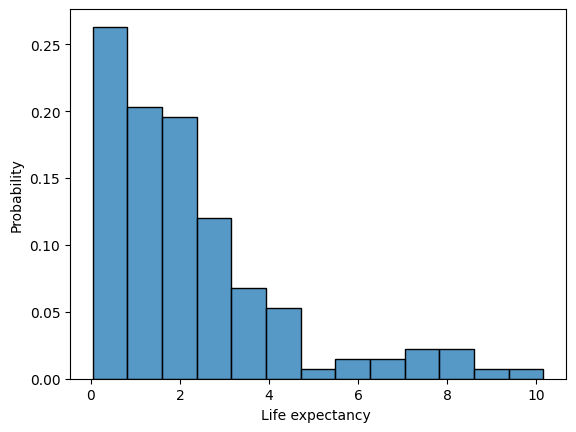

In [151]:
# Comparing actual values to predictions with a plot
Y_pred = reg.predict(X)
error = abs(Y - Y_pred)
sns.histplot(error, stat="probability")

In [152]:
# How many values have an error of less than X years?
for i in range (1, 16):
    cont = np.count_nonzero(error < i)
    print(f"Error below {i} years: {(cont/len(error)*100):.3f}%") 

Error below 1 years: 29.323%
Error below 2 years: 56.391%
Error below 3 years: 75.940%
Error below 4 years: 84.962%
Error below 5 years: 90.226%
Error below 6 years: 91.729%
Error below 7 years: 93.985%
Error below 8 years: 96.241%
Error below 9 years: 99.248%
Error below 10 years: 99.248%
Error below 11 years: 100.000%
Error below 12 years: 100.000%
Error below 13 years: 100.000%
Error below 14 years: 100.000%
Error below 15 years: 100.000%


In [153]:
# Comparing Basic Model with Final Model
R2_test, RSE_test = k_fold(X, Y)
final_model = [len(X.columns), reg.score(X, Y), RSE(X, Y, reg), R2_test, RSE_test]

X_old = df.drop("Life expectancy ", axis=1)
reg_old = LinearRegression().fit(X_old, Y)
R2_test, RSE_test = k_fold(X_old, Y)
basic_model = [len(X_old.columns), reg_old.score(X_old, Y), RSE(X_old, Y, reg_old), R2_test, RSE_test]

var = []
for a, b in zip(basic_model, final_model):
    var.append((b - a) / a)

labels = ["Predictors (#)", "Train R2", "Train RSE", "Test R2", "Test RSE"]

comparison_table = pd.DataFrame({"Basic Model": basic_model, "Final Model": final_model, "Var": var}, index=labels)
comparison_table.to_csv("ComparisonTable.csv")
comparison_table


,Basic Model,Final Model,Var
Predictors (#),19.00000,5.00000,-0.73684
Train R2,0.87999,0.87178,-0.00932
Train RSE,2.96828,3.06807,0.03362
Test R2,0.80073,0.85545,0.06834
Test RSE,4.02292,3.40047,-0.15473


This model has a R2 above 0.85 in both training and testing sets. This is considered a pretty good accuracy. It also has a RSE of about 3.4 (in testing set), which means we our predictions will deviate, on average, 3.4 years from the actual life expectancy. Since life expectancy is something that varies a lot from person to person, using this range of error can be considered quite good.<br><br>
From the histogram and the cell above, we see that more than half of the data has an error below 2 years, and less than 5% of the data has an error of more than 8 years. There are no errors above 11 years, too.<br><br>
Furthermore, the model considers only 5 variables to be statiscally relevant. Infant deaths, Under-five deaths and Adult Mortality are to be expected, since countries with higher death rates tend to have lower life expectancy.<br><br>
The addition of income composition of resources is interesting. This variable considers the GNI per capita of a country, so it's similar to GDB per capita, but in logarithmic scale. This means that the higher the GNI per capita the higher the life expectancy tends to be, but the importance decreases (there's a higher variation for small values). Therefore, countries with lower GNI per capita should focus on this, but countries with higher values probably shouldn't put so much effort in it.<br><br>
Since HIV/AIDS is also in logarithmic scale, the same interpretation applies to it.  